In [1]:
import numpy as np
import cv2

In [2]:
!wget https://github.com/dididogdididog/Intelligent-Systems-Theory-Final-Project/raw/main/datas.zip

--2022-06-10 04:23:29--  https://github.com/dididogdididog/Intelligent-Systems-Theory-Final-Project/raw/main/datas.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dididogdididog/Intelligent-Systems-Theory-Final-Project/main/datas.zip [following]
--2022-06-10 04:23:30--  https://raw.githubusercontent.com/dididogdididog/Intelligent-Systems-Theory-Final-Project/main/datas.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67477807 (64M) [application/zip]
Saving to: ‘datas.zip’

datas.zip           100%[===================>]  64.35M   260MB/s    in 0.2s    

2022-06-10 04:23:32 (260 MB/s) -

In [ ]:
!unzip datas.zip

In [4]:
def image_processing(image):
  image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  return image[100:,:]

In [5]:
#load turn angle
turnAngles=list()
images=list()
for j in range(6,16):
  count=0
  with open('datas/training data/turn'+str(j)+'.txt') as f:
    for line in f:
      count+=1
      turnAngles.append(float(line.split()[1]))
  for i in range(count):
    image=cv2.imread('datas/training data/pictures'+str(j)+'/'+str(i)+'.jpg')
    image=image_processing(image)
    images.append(image)
num_images=len(turnAngles)

In [6]:
#images augmentation by flipping
for i in range(num_images):
  image=images[i]
  image=cv2.flip(image,1)
  images.append(image)

  turnAngle=-turnAngles[i]
  turnAngles.append(turnAngle)
num_images=num_images*2
images=np.array(images)
turnAngles=np.array(turnAngles)

In [7]:
images_flat=images.reshape(images.shape[0],images.shape[1]*images.shape[2])

In [8]:
images_flat=images_flat/255

In [9]:
X_train1=images_flat
y_train1=turnAngles

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Conv2D
from keras.layers import Flatten


In [15]:
model1 = Sequential()
model1.add(Dense(32, input_shape=(X_train1.shape[1],), activation="sigmoid"))
model1.add(Dense(1))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                1433632   
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,433,665
Trainable params: 1,433,665
Non-trainable params: 0
_________________________________________________________________


In [16]:
model1.compile(loss='mean_squared_error', optimizer='sgd')
history1=model1.fit(X_train1,y_train1,validation_split=0.2,epochs=100,batch_size=32)

Epoch 1/100
173/173 [==============================] - 2s 8ms/step - loss: 0.1558 - val_loss: 0.0677
Epoch 2/100
173/173 [==============================] - 1s 5ms/step - loss: 0.0707 - val_loss: 0.0772
Epoch 3/100
173/173 [==============================] - 1s 5ms/step - loss: 0.0653 - val_loss: 0.0547
Epoch 4/100
173/173 [==============================] - 1s 5ms/step - loss: 0.0584 - val_loss: 0.0542
Epoch 5/100
173/173 [==============================] - 1s 5ms/step - loss: 0.0537 - val_loss: 0.0508
Epoch 6/100
173/173 [==============================] - 1s 5ms/step - loss: 0.0510 - val_loss: 0.0549
Epoch 7/100
173/173 [==============================] - 1s 6ms/step - loss: 0.0477 - val_loss: 0.0397
Epoch 8/100
173/173 [==============================] - 1s 5ms/step - loss: 0.0472 - val_loss: 0.0487
Epoch 9/100
173/173 [==============================] - 1s 5ms/step - loss: 0.0457 - val_loss: 0.0383
Epoch 10/100
173/173 [==============================] - 1s 5ms/step - loss: 0.0446 - val_lo

In [17]:
from matplotlib import pyplot as plt

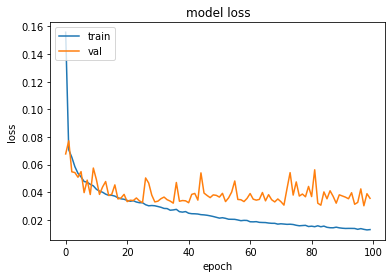

In [20]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error

mse of train data: 0.010169438901246776
mse of validation data: 0.01278596160287651
[[ 0.00149976]
 [ 0.33131057]
 [ 0.4890921 ]
 [ 0.0915813 ]
 [ 0.27894697]
 [ 0.1043081 ]
 [-0.2879871 ]
 [-0.03089686]
 [ 0.37484503]
 [ 0.23053764]]
[ 0.1   0.42  0.5   0.09  0.25  0.   -0.33  0.07  0.15  0.2 ]


mse of test data: 0.04988888526281867
[[-0.3778795 ]
 [-0.39617005]
 [ 0.35056642]
 [-0.32462037]
 [-0.33977535]
 [ 0.12958807]
 [-0.1380042 ]
 [ 0.14253207]
 [-0.07745217]
 [ 0.11621192]]
[ 0.11 -0.33  0.5  -0.5  -0.5  -0.08 -0.5   0.25  0.43  0.  ]


In [22]:
del model1

In [25]:
model2 = Sequential()
model2.add(Dropout(0.2,input_shape=(X_train1.shape[1],)))
model2.add(Dense(32, activation="sigmoid"))
model2.add(Dropout(0.2))
model2.add(Dense(1))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 44800)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                1433632   
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,433,665
Trainable params: 1,433,665
Non-trainable params: 0
_________________________________________________________________


In [26]:
model2.compile(loss='mean_squared_error', optimizer='sgd')
history2=model2.fit(X_train1,y_train1,validation_split=0.2,epochs=100,batch_size=32)

Epoch 1/100
173/173 [==============================] - 2s 9ms/step - loss: 0.1906 - val_loss: 0.0761
Epoch 2/100
173/173 [==============================] - 1s 7ms/step - loss: 0.0788 - val_loss: 0.0714
Epoch 3/100
173/173 [==============================] - 1s 6ms/step - loss: 0.0723 - val_loss: 0.0679
Epoch 4/100
173/173 [==============================] - 1s 6ms/step - loss: 0.0681 - val_loss: 0.0535
Epoch 5/100
173/173 [==============================] - 1s 6ms/step - loss: 0.0623 - val_loss: 0.0485
Epoch 6/100
173/173 [==============================] - 1s 6ms/step - loss: 0.0581 - val_loss: 0.0529
Epoch 7/100
173/173 [==============================] - 1s 6ms/step - loss: 0.0545 - val_loss: 0.0473
Epoch 8/100
173/173 [==============================] - 1s 6ms/step - loss: 0.0515 - val_loss: 0.0395
Epoch 9/100
173/173 [==============================] - 1s 6ms/step - loss: 0.0495 - val_loss: 0.0535
Epoch 10/100
173/173 [==============================] - 1s 6ms/step - loss: 0.0481 - val_lo

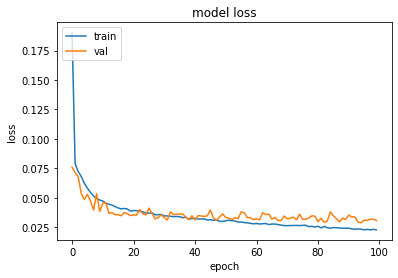

In [27]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

mse of train data: 0.02021303953629138
mse of validation data: 0.022432232622110308
[[-0.04809894]
 [ 0.3122131 ]
 [ 0.47517654]
 [ 0.03139642]
 [ 0.21481448]
 [ 0.04975458]
 [-0.20165716]
 [-0.02557138]
 [ 0.3315298 ]
 [ 0.23169437]]
[ 0.1   0.42  0.5   0.09  0.25  0.   -0.33  0.07  0.15  0.2 ]


mse of test data: 0.04645701240236054
[[-0.16448729]
 [-0.4107554 ]
 [ 0.27442992]
 [-0.21590099]
 [-0.19970399]
 [ 0.16606864]
 [-0.06870848]
 [ 0.18014315]
 [ 0.00108573]
 [ 0.00374604]]
[ 0.11 -0.33  0.5  -0.5  -0.5  -0.08 -0.5   0.25  0.43  0.  ]


In [28]:
del model2

In [34]:
X_train2=images
y_train2=turnAngles

In [35]:
model3 = Sequential()
model3.add(Lambda(lambda x: x / 127.5 - 1., input_shape=(140,320, 1)))
model3.add(Conv2D(24, (5, 5),(3,3), padding='valid',activation='relu'))
model3.add(Conv2D(36, (5, 5),(3,3), padding='valid',activation='relu'))
model3.add(Conv2D(48, (5, 5),(2,2), padding='valid',activation='relu'))
model3.add(Conv2D(64, (3, 3),(1,1), padding='valid',activation='relu'))
model3.add(Conv2D(64, (3, 3),(1,1), padding='valid',activation='relu'))
model3.add(Flatten())
model3.add(Dense(1164,activation='relu'))
model3.add(Dense(100,activation='relu'))
model3.add(Dense(50,activation='relu'))
model3.add(Dense(10,activation='relu'))
model3.add(Dense(1))
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 140, 320, 1)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 106, 24)       624       
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 34, 36)        21636     
                                                                 
 conv2d_12 (Conv2D)          (None, 5, 15, 48)         43248     
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 13, 64)         27712     
                                                                 
 conv2d_14 (Conv2D)          (None, 1, 11, 64)         36928     
                                                                 
 flatten_2 (Flatten)         (None, 704)              

In [36]:
model3.compile(loss='mean_squared_error', optimizer='sgd')
history3=model3.fit(X_train2,y_train2,validation_split=0.2,epochs=50,batch_size=32)

Epoch 1/50
173/173 [==============================] - 2s 11ms/step - loss: 0.0736 - val_loss: 0.0704
Epoch 2/50
173/173 [==============================] - 2s 9ms/step - loss: 0.0723 - val_loss: 0.0700
Epoch 3/50
173/173 [==============================] - 1s 9ms/step - loss: 0.0710 - val_loss: 0.0694
Epoch 4/50
173/173 [==============================] - 1s 8ms/step - loss: 0.0688 - val_loss: 0.0687
Epoch 5/50
173/173 [==============================] - 1s 9ms/step - loss: 0.0650 - val_loss: 0.0626
Epoch 6/50
173/173 [==============================] - 1s 9ms/step - loss: 0.0591 - val_loss: 0.0586
Epoch 7/50
173/173 [==============================] - 1s 9ms/step - loss: 0.0514 - val_loss: 0.0489
Epoch 8/50
173/173 [==============================] - 2s 9ms/step - loss: 0.0436 - val_loss: 0.0426
Epoch 9/50
173/173 [==============================] - 1s 9ms/step - loss: 0.0371 - val_loss: 0.0368
Epoch 10/50
173/173 [==============================] - 2s 9ms/step - loss: 0.0315 - val_loss: 0.033

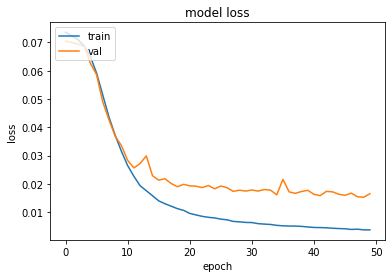

In [37]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

mse of test data: 0.06362371356573525
[[ 0.11126554]
 [-0.42198542]
 [ 0.2826733 ]
 [-0.31035584]
 [-0.31996244]
 [ 0.09622835]
 [-0.28828862]
 [-0.07482874]
 [-0.11453351]
 [ 0.02296521]]
[ 0.11 -0.33  0.5  -0.5  -0.5  -0.08 -0.5   0.25  0.43  0.  ]


In [38]:
del model3

In [39]:
model4 = Sequential()
model4.add(Lambda(lambda x: x / 127.5 - 1., input_shape=(140,320, 1)))
model4.add(Conv2D(24, (5, 5),(3,3), padding='valid',activation='relu'))
model4.add(Conv2D(36, (5, 5),(3,3), padding='valid',activation='relu'))
model4.add(Conv2D(48, (5, 5),(2,2), padding='valid',activation='relu'))
model4.add(Conv2D(64, (3, 3),(1,1), padding='valid',activation='relu'))
model4.add(Conv2D(64, (3, 3),(1,1), padding='valid',activation='relu'))
model4.add(Flatten())
model4.add(Dense(1164,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(100,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(50,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(10,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1))
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_3 (Lambda)           (None, 140, 320, 1)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 46, 106, 24)       624       
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 34, 36)        21636     
                                                                 
 conv2d_17 (Conv2D)          (None, 5, 15, 48)         43248     
                                                                 
 conv2d_18 (Conv2D)          (None, 3, 13, 64)         27712     
                                                                 
 conv2d_19 (Conv2D)          (None, 1, 11, 64)         36928     
                                                                 
 flatten_3 (Flatten)         (None, 704)              

In [40]:
model4.compile(loss='mean_squared_error', optimizer='sgd')
history4=model4.fit(X_train2,y_train2,validation_split=0.2,epochs=100,batch_size=32)

Epoch 1/100
173/173 [==============================] - 2s 11ms/step - loss: 0.0737 - val_loss: 0.0708
Epoch 2/100
173/173 [==============================] - 1s 9ms/step - loss: 0.0731 - val_loss: 0.0716
Epoch 3/100
173/173 [==============================] - 1s 9ms/step - loss: 0.0725 - val_loss: 0.0717
Epoch 4/100
173/173 [==============================] - 2s 10ms/step - loss: 0.0716 - val_loss: 0.0739
Epoch 5/100
173/173 [==============================] - 2s 10ms/step - loss: 0.0703 - val_loss: 0.0715
Epoch 6/100
173/173 [==============================] - 1s 9ms/step - loss: 0.0685 - val_loss: 0.0670
Epoch 7/100
173/173 [==============================] - 2s 10ms/step - loss: 0.0660 - val_loss: 0.0645
Epoch 8/100
173/173 [==============================] - 1s 9ms/step - loss: 0.0629 - val_loss: 0.0680
Epoch 9/100
173/173 [==============================] - 2s 9ms/step - loss: 0.0589 - val_loss: 0.0554
Epoch 10/100
173/173 [==============================] - 2s 9ms/step - loss: 0.0556 - va

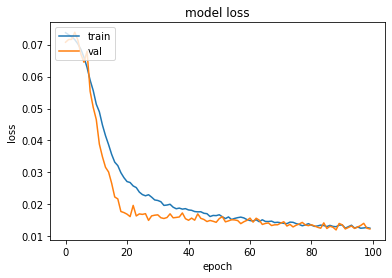

In [41]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

mse of test data: 0.053738958940060214
[[ 0.177891  ]
 [-0.4679802 ]
 [ 0.32182965]
 [-0.22859754]
 [-0.31998158]
 [ 0.17362262]
 [-0.04115919]
 [-0.09041429]
 [-0.06864369]
 [ 0.03120733]]
[ 0.11 -0.33  0.5  -0.5  -0.5  -0.08 -0.5   0.25  0.43  0.  ]
